# Thailand Upstream Production, Reserves, Stakeholders Visualisation

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import itertools

import seaborn as sns
plt.style.use("seaborn")

### PRODUCTION DATA


In [5]:
#Load Data
#df = pd.read_excel("ThailandProdPython.xlsx")
df = pd.read_excel("ThailandProdPython.xlsx", index_col=0, parse_dates=True)

In [6]:
#Check data
df.head()

,Country,Field,BOPD,MMCFD,BCPD,Operator,OffOnn
Date,,,,,,,
1986-01-01,Thailand,Sirikit,20413,32,0,PTTEP,Onshore
1986-02-01,Thailand,Sirikit,21231,34,0,PTTEP,Onshore
1986-03-01,Thailand,Sirikit,20773,31,0,PTTEP,Onshore
1986-04-01,Thailand,Sirikit,15704,22,0,PTTEP,Onshore
1986-05-01,Thailand,Sirikit,19808,28,0,PTTEP,Onshore


In [7]:
#Transpose df for plotting
#Unstacking example
dfBOPD = df[["BOPD", "Field"]].set_index("Field", append=True).BOPD.unstack("Field")
dfBOPD = dfBOPD.fillna(0)
dfBOPD = dfBOPD.loc[:, (dfBOPD.sum(axis=0) != 0)]
#dfBOPD.fillna(0)
dfBOPD.head()

Field,B8/32,Bualuang,Erawan,Jasmine,Manora,Nasanun,NongYao,Others,Sirikit,Songkhla,Wassana
Date,,,,,,,,,,,
1986-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20413.0,0.0,0.0
1986-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21231.0,0.0,0.0
1986-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20773.0,0.0,0.0
1986-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15704.0,0.0,0.0
1986-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19808.0,0.0,0.0


In [8]:
#Liquids defined as Oil + Condensate
df['BLPD'] = df['BOPD'] + df['BCPD']

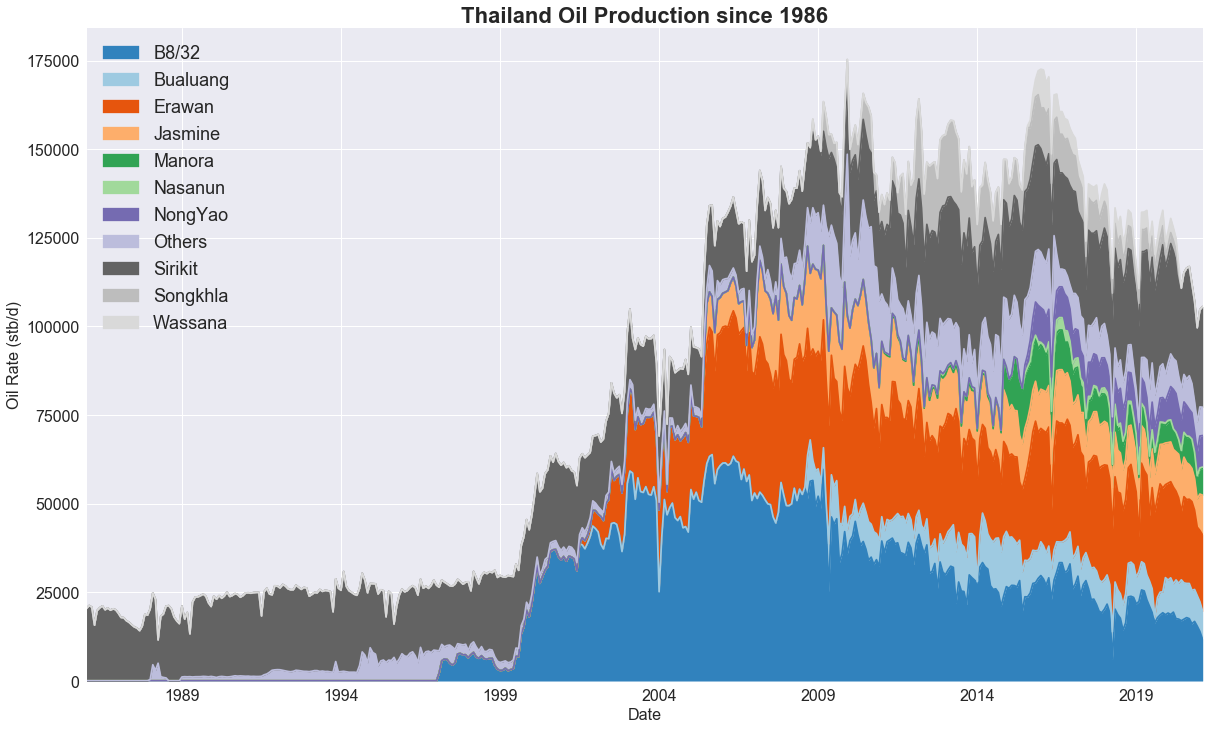

In [9]:
#Genreate oil production stakced chart
#https://towardsdatascience.com/plotting-with-python-c2561b8c0f1f
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

#ax = df.groupby([df.index, 'Field'])['BOPD'].sum().unstack((df.sum(axis=0) != 0)).plot(
#    kind='area',
#    figsize=(20,12),
#    fontsize = 16
    #cmap="YlGn", # defaults to orangish
#
#dark_jet = cmap_map(lambda x: x*0.75, matplotlib.cm.jet)

ax = dfBOPD.plot(
    kind='area',
    figsize=(20,12),
    fontsize = 16,
    cmap="tab20c",  # defaults to orangish
)

ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Oil Rate (stb/d)", fontsize=16)
ax.set_title("Thailand Oil Production since 1986", fontsize=22, weight ='bold')
ax.legend(fontsize = 18)

ax.figure.savefig('BOPD.jpeg')

In [10]:
#Aggregate function to consolidate nation's production
#df = df.sort_index()
#df2 = df.reset_index()
#df2Agg = df2.groupby('Date').agg({'BOPD': 'sum', 'MMCFD': 'sum', 'BCPD': 'sum'})
dfAgg = df.groupby(df.index).agg({'BOPD': 'sum', 'MMCFD': 'sum', 'BCPD': 'sum', 'BLPD':'sum'})
#df2.dtypes
#df2
dfAgg

,BOPD,MMCFD,BCPD,BLPD
Date,,,,
1986-01-01,20413,370,15981,36394
1986-02-01,21231,350,15093,36324
1986-03-01,20773,373,15993,36766
1986-04-01,15704,352,15566,31270
1986-05-01,19808,362,15493,35301
...,...,...,...,...
2020-10-01,111865,3416,84539,196404
2020-11-01,107050,3399,83713,190763
2020-12-01,99604,3321,80082,179686


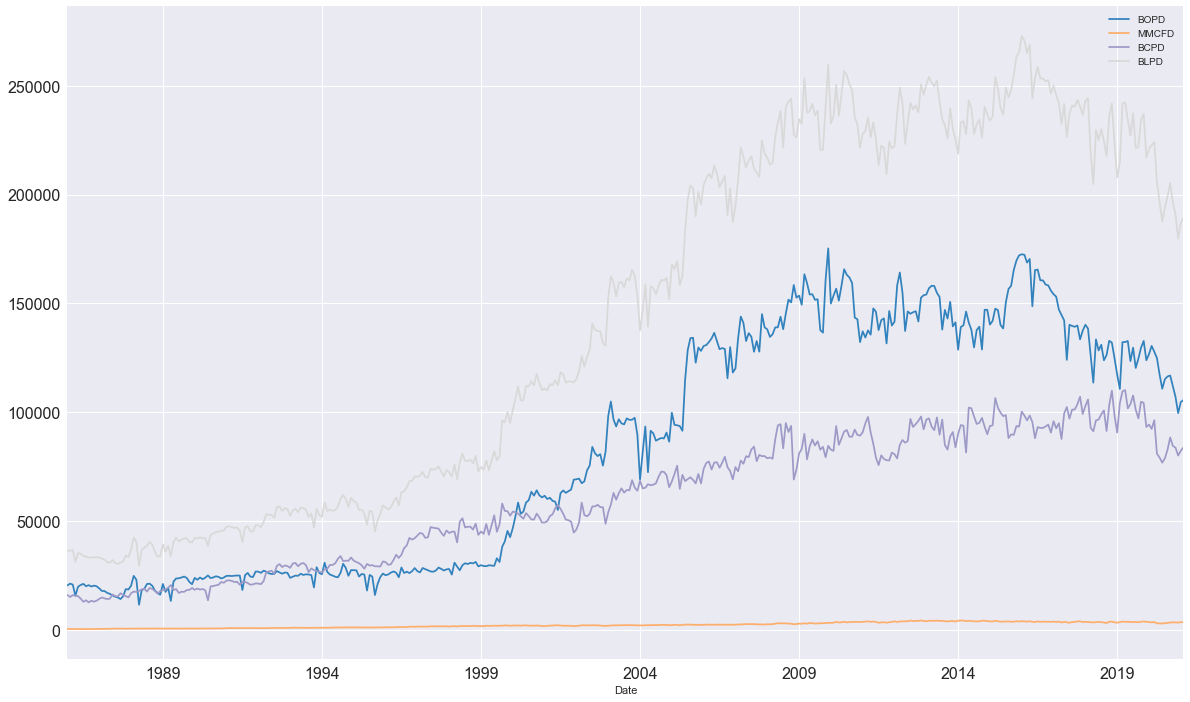

In [11]:
#Plot consolidated function
ax = dfAgg.plot(
    kind='line',
    figsize=(20,12),
    fontsize = 16,
    cmap="tab20c",  # defaults to orangish
)

In [12]:
#Retreieve Peak Oil Production
PeakOil = dfAgg['BOPD'].idxmax()
PeakOilRate = dfAgg['BOPD'].max()
print(PeakOil,PeakOilRate)

dfAgg['BOPD'].nlargest(2)
print(dfAgg.loc[dfAgg.index == '2021-02-01' , 'BOPD'])

2009-12-01 00:00:00 175288
Date
2021-02-01    105570
Name: BOPD, dtype: int64


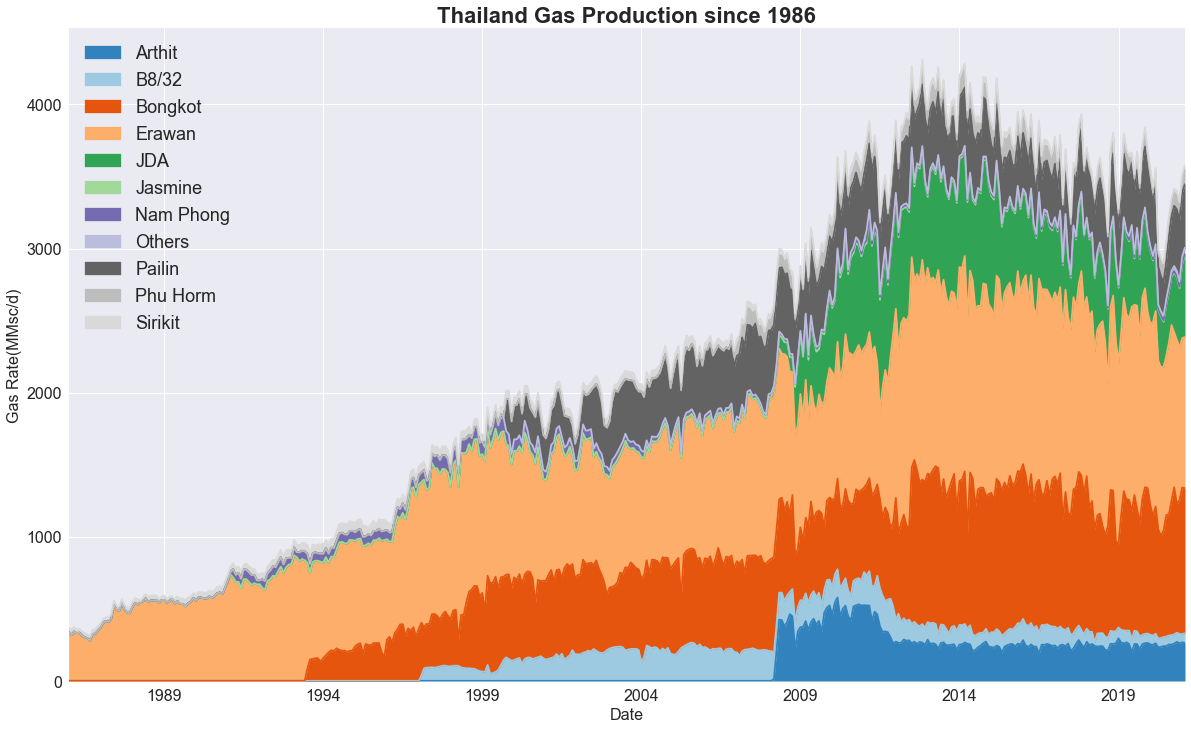

In [13]:
#Gas
dfMMCFD = df[["MMCFD", "Field"]].set_index("Field", append=True).MMCFD.unstack("Field")
dfMMCFD = dfMMCFD.fillna(0)
dfMMCFD = dfMMCFD.loc[:, (dfMMCFD.sum(axis=0) != 0)]
#dfBOPD.fillna(0)
#dfMMCFD.head()

ax = dfMMCFD.plot(
    kind='area',
    figsize=(20,12),
    fontsize = 16,
    cmap="tab20c", # defaults to orangish
)

ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Gas Rate(MMsc/d)", fontsize=16)
ax.set_title("Thailand Gas Production since 1986", fontsize=22, weight ='bold')
ax.legend(fontsize = 18)


ax.figure.savefig('MMCFD.jpeg')

In [14]:
#Gas Production Rates
print(dfAgg.loc[dfAgg.index == '2000-12-01' , 'MMCFD'])
dfAgg['MMCFD'].nlargest(2)
print(dfAgg.loc[dfAgg.index == '2021-02-01' , 'MMCFD'])

Date
2000-12-01    1765
Name: MMCFD, dtype: int64
Date
2021-02-01    3580
Name: MMCFD, dtype: int64


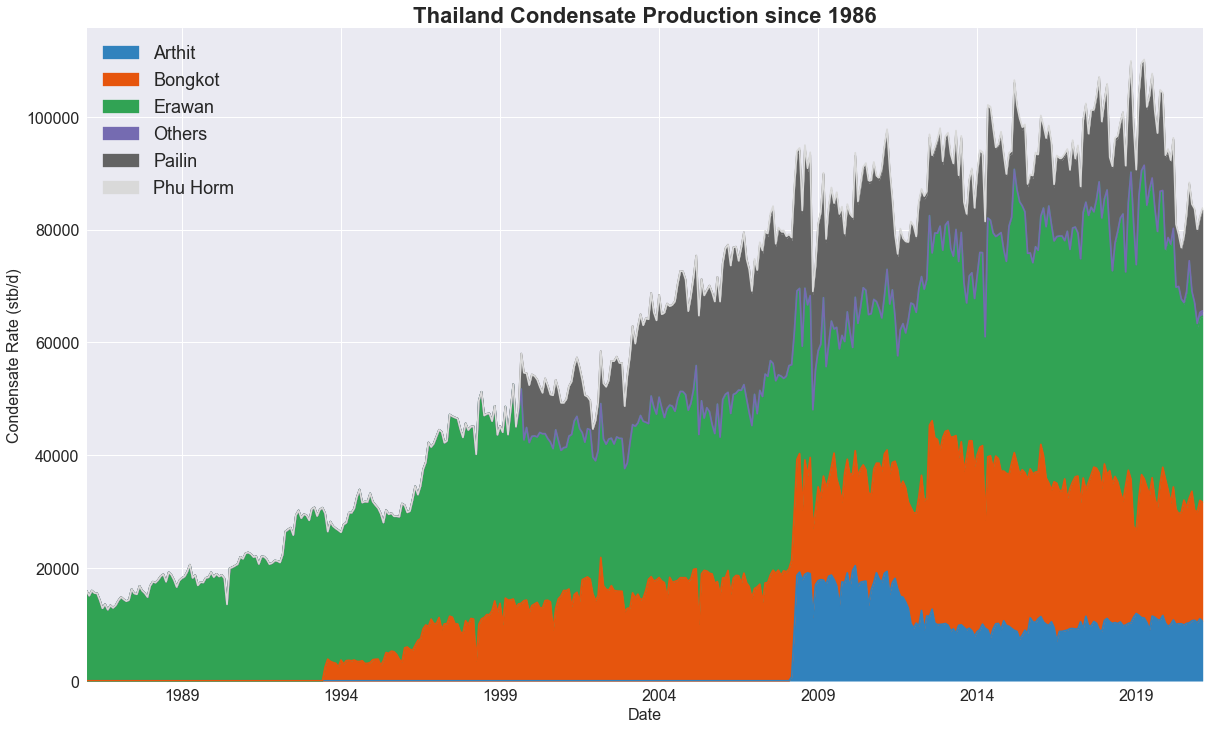

In [15]:
#Unstacking example
dfBCPD = df[["BCPD", "Field"]].set_index("Field", append=True).BCPD.unstack("Field")
dfBCPD = dfBCPD.fillna(0)
dfBCPD = dfBCPD.loc[:, (dfBCPD.sum(axis=0) != 0)]
#dfBOPD.fillna(0)
#dfMMCFD.head()

ax = dfBCPD.plot(
    kind='area',
    figsize=(20,12),
    fontsize = 16,
    cmap="tab20c", # defaults to orangish
)

ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Condensate Rate (stb/d)", fontsize=16)
ax.set_title("Thailand Condensate Production since 1986", fontsize=22, weight ='bold')
ax.legend(fontsize = 18)


ax.figure.savefig('BCPD.jpeg')

In [16]:
print(dfAgg.loc[dfAgg.index == '2021-02-01' , 'BCPD'])

Date
2021-02-01    83837
Name: BCPD, dtype: int64


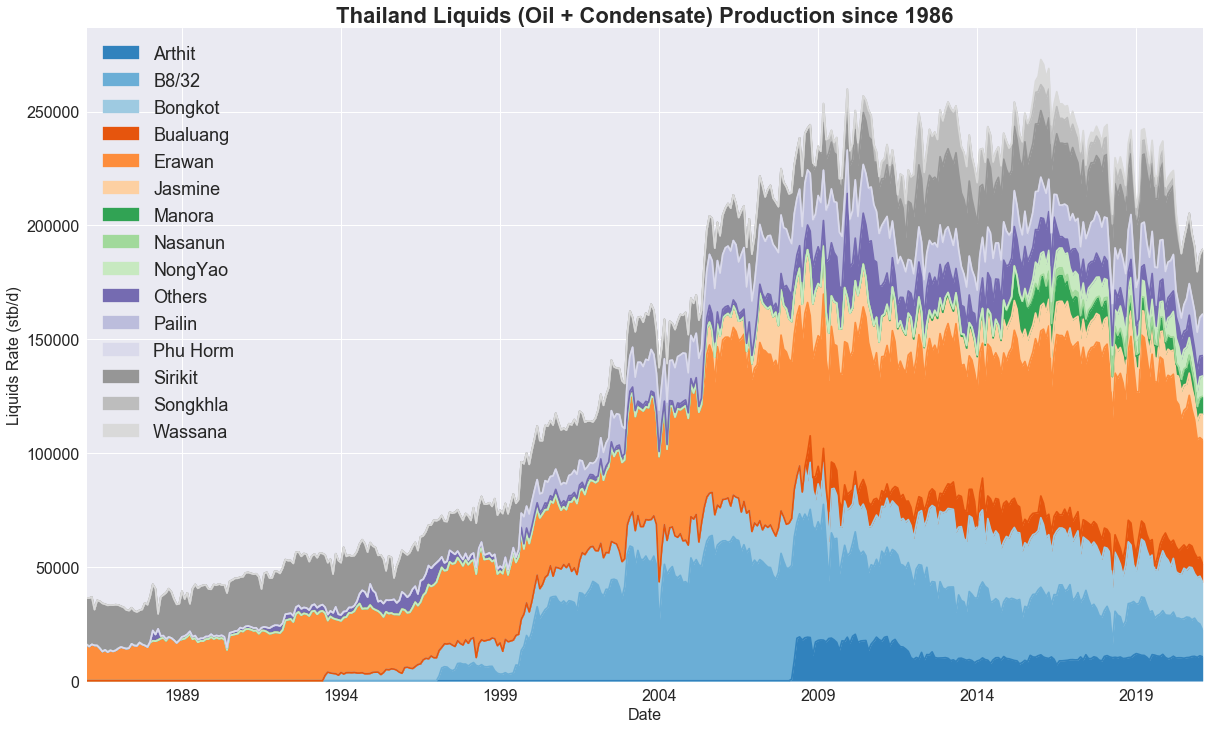

In [17]:
#Unstacking example
dfBLPD = df[["BLPD", "Field"]].set_index("Field", append=True).BLPD.unstack("Field")
dfBLPD = dfBLPD.fillna(0)
dfBLPD = dfBLPD.loc[:, (dfBLPD.sum(axis=0) != 0)]
#dfBOPD.fillna(0)
#dfMMCFD.head()

ax = dfBLPD.plot(
    kind='area',
    figsize=(20,12),
    fontsize = 16,
    cmap="tab20c", # defaults to orangish
)

ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Liquids Rate (stb/d)", fontsize=16)
ax.set_title("Thailand Liquids (Oil + Condensate) Production since 1986", fontsize=22, weight ='bold')
ax.legend(fontsize = 18)


ax.figure.savefig('BLPD.jpeg')

In [26]:
#Load Summary Data
#df = pd.read_excel("ThailandProdPython.xlsx")
dfSum = pd.read_excel("ThailandProdPython.xlsx", sheet_name = 'Summary', index_col=0, parse_dates=True)

In [27]:
dfSum.head()

,OnOff,Discovery,FirstOil,Block,Contract,Operator,Gp Bscf,Cp MMstb,Np MMstb,1P Bscf,...,CHESS,CPOC,XOM,Apico,Eco Orient,Pan Orient,Sino US,Central Place,Thai Offshore,CNPCHK
Area,,,,,,,,,,,,,,,,,,,,,
Erawan,Offshore,1973-01-01 00:00:00,1981-08-01 00:00:00,"B12,B13",Contract 1 / 2,Chevron,3288.08,112.82,0.00,278.26,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
Sirikit et al,Land,1981-09-01 00:00:00,1982-12-01 00:00:00,S1,-,PTTEP,561.53,0.00,287.52,47.46,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
Baanpot,Offshore,1974-05-01 00:00:00,1983-10-01 00:00:00,"B12,B13",Contract 1 / 2,Chevron,423.86,17.48,0.00,30.84,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
Satun,Offshore,1980-10-01 00:00:00,1985-01-01 00:00:00,"B10, B11, B12",Contract 1 / 2,Chevron,2163.90,65.85,0.00,104.83,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
Platong,Offshore,1976-06-01 00:00:00,1985-03-01 00:00:00,"B10, B11, B12",Contract 1 / 2,Chevron,680.83,38.41,0.00,298.32,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0


In [28]:
#Calcualte MMBOE using 5800 cf per stb 
dfSum['MMBOEp'] = dfSum['Cp MMstb'] + dfSum['Np MMstb'] + dfSum['Gp Bscf']/5.8

In [29]:
dfSum.head()

,OnOff,Discovery,FirstOil,Block,Contract,Operator,Gp Bscf,Cp MMstb,Np MMstb,1P Bscf,...,CPOC,XOM,Apico,Eco Orient,Pan Orient,Sino US,Central Place,Thai Offshore,CNPCHK,MMBOEp
Area,,,,,,,,,,,,,,,,,,,,,
Erawan,Offshore,1973-01-01 00:00:00,1981-08-01 00:00:00,"B12,B13",Contract 1 / 2,Chevron,3288.08,112.82,0.00,278.26,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,679.730345
Sirikit et al,Land,1981-09-01 00:00:00,1982-12-01 00:00:00,S1,-,PTTEP,561.53,0.00,287.52,47.46,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,384.335517
Baanpot,Offshore,1974-05-01 00:00:00,1983-10-01 00:00:00,"B12,B13",Contract 1 / 2,Chevron,423.86,17.48,0.00,30.84,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,90.559310
Satun,Offshore,1980-10-01 00:00:00,1985-01-01 00:00:00,"B10, B11, B12",Contract 1 / 2,Chevron,2163.90,65.85,0.00,104.83,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,438.936207
Platong,Offshore,1976-06-01 00:00:00,1985-03-01 00:00:00,"B10, B11, B12",Contract 1 / 2,Chevron,680.83,38.41,0.00,298.32,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,155.794483


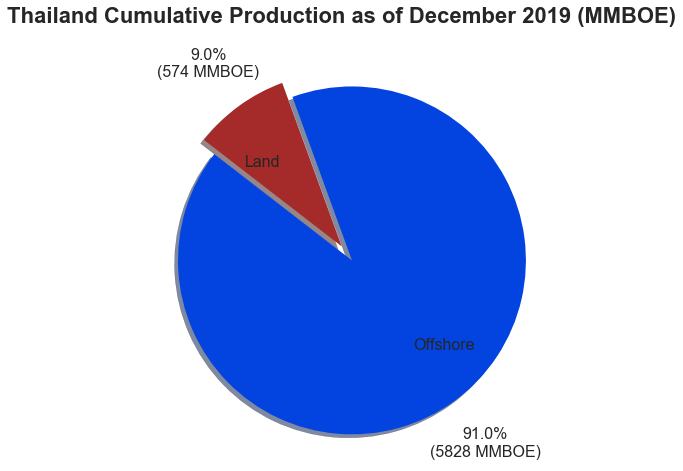

In [30]:
#Piechart
#https://matplotlib.org/stable/tutorials/colors/colors.html

total = sum(dfSum['MMBOEp'])

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} MMBOE)".format(pct, absolute)

ax2 = dfSum.groupby(['OnOff'])['MMBOEp'].sum().plot(
    kind='pie',
    figsize=(12,8),
    explode = (0,0.1),
    colors = ['#A52A2A', '#0343DF'],
    #autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    autopct=lambda pct: func(pct, total),
    pctdistance=1.3, labeldistance=0.6,
    shadow=True, startangle=110, 
    fontsize = 16,
    #cmap="Blues_r", # defaults to orangish
)

ax2.set_title("Thailand Cumulative Production as of December 2019 (MMBOE)", fontsize=22, weight ='bold')
ax2.set_ylabel('')

ax2.figure.savefig('CumProd2019.jpeg')

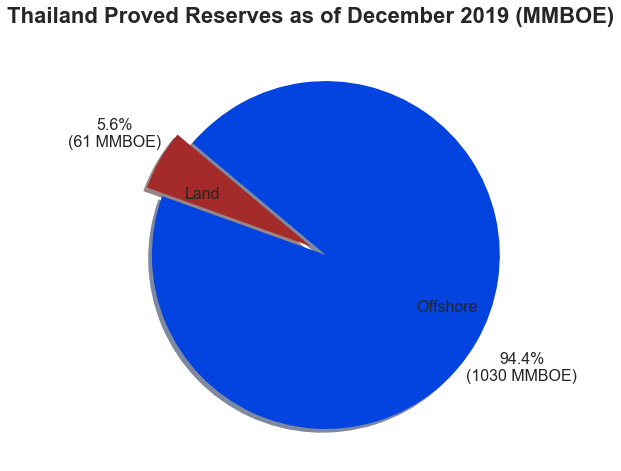

In [31]:
#Piechart
#https://matplotlib.org/stable/tutorials/colors/colors.html

#Calcualte MMBOE using 5800 cf per stb 
dfSum['MMBOE1p'] = dfSum['1P MMstb'] + dfSum['1P MMstbC'] + dfSum['1P Bscf']/5.8
total = sum(dfSum['MMBOE1p'])

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} MMBOE)".format(pct, absolute)

ax2 = dfSum.groupby(['OnOff'])['MMBOE1p'].sum().plot(
    kind='pie',
    figsize=(12,8),
    explode = (0,0.1),
    colors = ['#A52A2A', '#0343DF'],
    #autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    autopct=lambda pct: func(pct, total),
    pctdistance=1.3, labeldistance=0.6,
    shadow=True, startangle=140, 
    fontsize = 16,
    #cmap="Blues_r", # defaults to orangish
)

ax2.set_title("Thailand Proved Reserves as of December 2019 (MMBOE)", fontsize=22, weight ='bold')
ax2.set_ylabel('')

ax.figure.savefig('1P2019.jpeg')

### RESERVES

In [32]:
#Load Reserves Data
#df = pd.read_excel("ThailandProdPython.xlsx")
dfReserves = pd.read_excel("ThailandProdPython.xlsx", sheet_name = 'Reserves', index_col=0, parse_dates=True)

In [27]:
dfReserves.head()

,Type,1P,2P,3P,Prod,Cum Prod
Date,,,,,,
2007-12-31,Oil MMstb,175.98,377.18,431.65,49.115428,406.100000
2007-12-31,Cond MMstb,264.77,587.30,727.50,28.778486,346.400000
2007-12-31,Gas Bscf,11198.18,22874.15,29717.43,917.917000,10330.950000
2008-12-31,Oil MMstb,182.91,605.40,781.30,52.680236,458.780236
2008-12-31,Cond MMstb,270.85,608.24,741.97,31.070895,377.470895


In [28]:
#Filter 2019 information
#dfReserves2 = dfReserves.reset_index()

is_2019 =  dfReserves.index=='2019-12-31'
dfReserves2019 = dfReserves[is_2019]
print(dfReserves2019.shape)
dfReserves2019

(3, 6)


,Type,1P,2P,3P,Prod,Cum Prod
Date,,,,,,
2019-12-31,Oil MMstb,125.54,217.76,274.50,46.0,1040.898615
2019-12-31,Cond MMstb,127.21,272.86,374.09,37.0,746.144025
2019-12-31,Gas Bscf,4882.33,9085.26,11149.61,1831.0,26765.618000


In [29]:
dfReserves2019a = dfReserves2019.set_index('Type')
dfReserves2019a

,1P,2P,3P,Prod,Cum Prod
Type,,,,,
Oil MMstb,125.54,217.76,274.50,46.0,1040.898615
Cond MMstb,127.21,272.86,374.09,37.0,746.144025
Gas Bscf,4882.33,9085.26,11149.61,1831.0,26765.618000


In [30]:
dfReserves2019a = dfReserves2019a.T
dfReserves2019a

Type,Oil MMstb,Cond MMstb,Gas Bscf
1P,125.540000,127.210000,4882.330
2P,217.760000,272.860000,9085.260
3P,274.500000,374.090000,11149.610
Prod,46.000000,37.000000,1831.000
Cum Prod,1040.898615,746.144025,26765.618


In [31]:
dfReserves2019a['Gas MMBOE'] = dfReserves2019a['Gas Bscf']/5.8
dfReserves2019a

Type,Oil MMstb,Cond MMstb,Gas Bscf,Gas MMBOE
1P,125.540000,127.210000,4882.330,841.781034
2P,217.760000,272.860000,9085.260,1566.424138
3P,274.500000,374.090000,11149.610,1922.346552
Prod,46.000000,37.000000,1831.000,315.689655
Cum Prod,1040.898615,746.144025,26765.618,4614.761724


In [32]:
dfReserves2019a = dfReserves2019a.drop(['Gas Bscf'],axis=1)
dfReserves2019a

Type,Oil MMstb,Cond MMstb,Gas MMBOE
1P,125.540000,127.210000,841.781034
2P,217.760000,272.860000,1566.424138
3P,274.500000,374.090000,1922.346552
Prod,46.000000,37.000000,315.689655
Cum Prod,1040.898615,746.144025,4614.761724


In [33]:
dfReserves2019a = dfReserves2019a.T
dfReserves2019a

,1P,2P,3P,Prod,Cum Prod
Type,,,,,
Oil MMstb,125.540000,217.760000,274.500000,46.000000,1040.898615
Cond MMstb,127.210000,272.860000,374.090000,37.000000,746.144025
Gas MMBOE,841.781034,1566.424138,1922.346552,315.689655,4614.761724


In [34]:
CumProd = [1041.90,746.14,4614.762]
dfReserves2019a['CumProd'] = CumProd
dfReserves2019a

,1P,2P,3P,Prod,Cum Prod,CumProd
Type,,,,,,
Oil MMstb,125.540000,217.760000,274.500000,46.000000,1040.898615,1041.900
Cond MMstb,127.210000,272.860000,374.090000,37.000000,746.144025,746.140
Gas MMBOE,841.781034,1566.424138,1922.346552,315.689655,4614.761724,4614.762


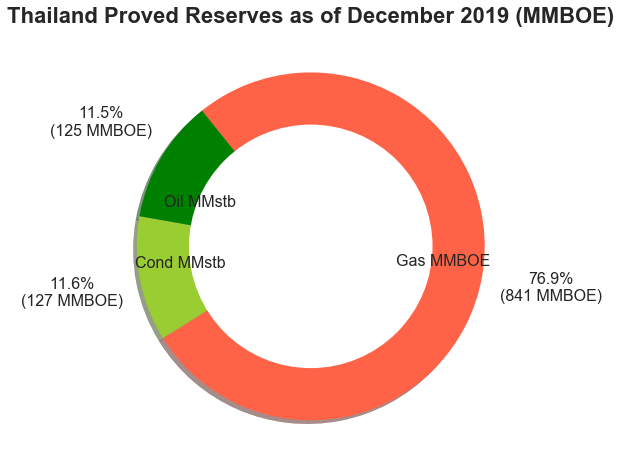

In [35]:
total1p = sum(dfReserves2019a['1P'])

ax2 = dfReserves2019a.groupby(['Type'])['1P'].sum().plot(
    kind='pie',
    figsize=(12,8),
    #explode = (0,0.1,0),
    colors = ['#9ACD32', '#FF6347', '#008000'],
    #autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    autopct=lambda pct: func(pct, total1p),
    pctdistance=1.4, labeldistance=0.5,
    shadow=True, startangle=170, 
    fontsize = 16,
    #cmap="Blues_r", # defaults to orangish
)

ax2.set_title("Thailand Proved Reserves as of December 2019 (MMBOE)", fontsize=22, weight ='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.set_ylabel('')

ax2.figure.savefig('1P2019Split.jpeg')

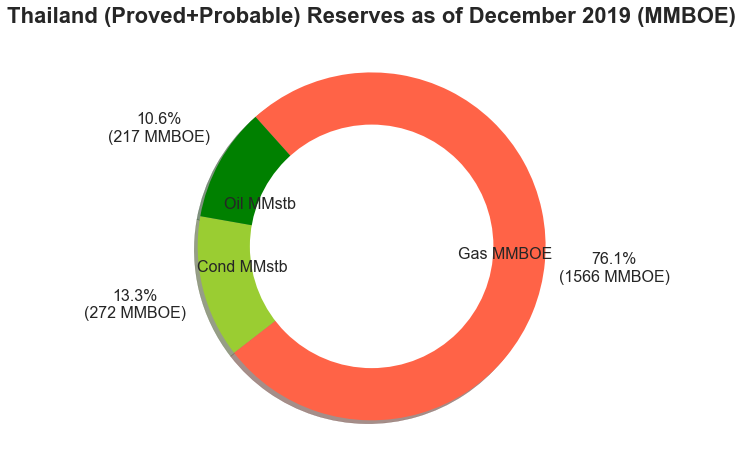

In [36]:
total2p = sum(dfReserves2019a['2P'])

ax3 = dfReserves2019a.groupby(['Type'])['2P'].sum().plot(
    kind='pie',
    figsize=(12,8),
    #explode = (0,0.1,0),
    colors = ['#9ACD32', '#FF6347', '#008000'],
    #autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    autopct=lambda pct: func(pct, total2p),
    pctdistance=1.4, labeldistance=0.5,
    shadow=True, startangle=170, 
    fontsize = 16,
    #cmap="Blues_r", # defaults to orangish
)

ax3.set_title("Thailand (Proved+Probable) Reserves as of December 2019 (MMBOE)", fontsize=22, weight ='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax3.set_ylabel('')

ax3.figure.savefig('2P2019Split.jpeg')

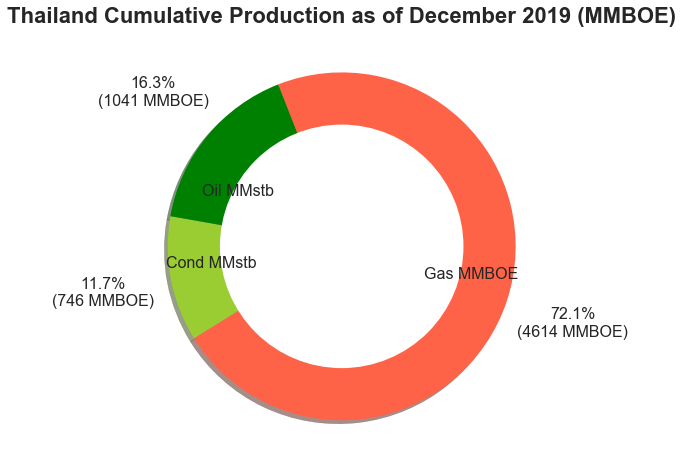

In [37]:
totalCumP = sum(dfReserves2019a['CumProd'])

ax3 = dfReserves2019a.groupby(['Type'])['CumProd'].sum().plot(
    kind='pie',
    figsize=(12,8),
    #explode = (0,0.1,0),
    colors = ['#9ACD32', '#FF6347', '#008000'],
    #autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    autopct=lambda pct: func(pct, totalCumP),
    pctdistance=1.4, labeldistance=0.5,
    shadow=True, startangle=170, 
    fontsize = 16,
    #cmap="Blues_r", # defaults to orangish
)

ax3.set_title("Thailand Cumulative Production as of December 2019 (MMBOE)", fontsize=22, weight ='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax3.set_ylabel('')

ax3.figure.savefig('CumP2019Split.jpeg')

In [38]:
print(dfReserves2019a['CumProd'].sum())
print(dfReserves2019a['1P'].sum())
print(dfReserves2019a['2P'].sum())

6402.802
1094.5310344827585
2057.0441379310346


In [39]:
dfReserves.head()

,Type,1P,2P,3P,Prod,Cum Prod
Date,,,,,,
2007-12-31,Oil MMstb,175.98,377.18,431.65,49.115428,406.100000
2007-12-31,Cond MMstb,264.77,587.30,727.50,28.778486,346.400000
2007-12-31,Gas Bscf,11198.18,22874.15,29717.43,917.917000,10330.950000
2008-12-31,Oil MMstb,182.91,605.40,781.30,52.680236,458.780236
2008-12-31,Cond MMstb,270.85,608.24,741.97,31.070895,377.470895


In [40]:
dfReserves2 = dfReserves
dfReserves2['Proved'] = dfReserves2['1P']
dfReserves2['Probable'] = dfReserves2['2P'] - dfReserves2['1P']
dfReserves2['Possible'] = dfReserves2['3P'] - dfReserves2['2P']
dfReserves2.head()

,Type,1P,2P,3P,Prod,Cum Prod,Proved,Probable,Possible
Date,,,,,,,,,
2007-12-31,Oil MMstb,175.98,377.18,431.65,49.115428,406.100000,175.98,201.20,54.47
2007-12-31,Cond MMstb,264.77,587.30,727.50,28.778486,346.400000,264.77,322.53,140.20
2007-12-31,Gas Bscf,11198.18,22874.15,29717.43,917.917000,10330.950000,11198.18,11675.97,6843.28
2008-12-31,Oil MMstb,182.91,605.40,781.30,52.680236,458.780236,182.91,422.49,175.90
2008-12-31,Cond MMstb,270.85,608.24,741.97,31.070895,377.470895,270.85,337.39,133.73


In [41]:
dfReserves2 = dfReserves2.drop(['1P','2P','3P','Prod'], axis=1)
dfReserves2.head()

,Type,Cum Prod,Proved,Probable,Possible
Date,,,,,
2007-12-31,Oil MMstb,406.100000,175.98,201.20,54.47
2007-12-31,Cond MMstb,346.400000,264.77,322.53,140.20
2007-12-31,Gas Bscf,10330.950000,11198.18,11675.97,6843.28
2008-12-31,Oil MMstb,458.780236,182.91,422.49,175.90
2008-12-31,Cond MMstb,377.470895,270.85,337.39,133.73


In [42]:
dfReservesOil = dfReserves2[dfReserves2['Type'] == 'Oil MMstb']
dfReservesOil = dfReservesOil.drop(['Type'], axis=1)

dfReservesCond = dfReserves2[dfReserves2['Type'] == 'Cond MMstb']
dfReservesCond = dfReservesCond.drop(['Type'], axis=1)

dfReservesGas = dfReserves2[dfReserves2['Type'] == 'Gas Bscf']
dfReservesGas = dfReservesGas.drop(['Type'], axis=1)

print(dfReservesOil.head())
print(dfReservesCond.head())
print(dfReservesGas.head())

              Cum Prod  Proved  Probable  Possible
Date                                              
2007-12-31  406.100000  175.98    201.20     54.47
2008-12-31  458.780236  182.91    422.49    175.90
2009-12-31  515.005217  180.26    471.37    169.80
2010-12-31  570.913735  197.28    460.30    243.94
2011-12-31  622.010611  214.56    383.11    209.76
              Cum Prod  Proved  Probable  Possible
Date                                              
2007-12-31  346.400000  264.77    322.53    140.20
2008-12-31  377.470895  270.85    337.39    133.73
2009-12-31  408.094385  255.12    335.88     86.12
2010-12-31  440.443353  245.21    335.44    129.59
2011-12-31  471.153151  238.71    306.29    126.37
             Cum Prod    Proved  Probable  Possible
Date                                               
2007-12-31  10330.950  11198.18  11675.97   6843.28
2008-12-31  11347.806  12002.55  12482.86   7630.54
2009-12-31  12439.322  12026.42  12665.24   6170.13
2010-12-31  13720.732  105

In [43]:
dfReservesGasMMBoe = dfReservesGas
dfReservesGasMMBoe = dfReservesGasMMBoe/5.8
dfReservesGasMMBoe

,Cum Prod,Proved,Probable,Possible
Date,,,,
2007-12-31,1781.198276,1930.720690,2013.098276,1179.875862
2008-12-31,1956.518276,2069.405172,2152.217241,1315.610345
2009-12-31,2144.710690,2073.520690,2183.662069,1063.815517
2010-12-31,2365.643448,1825.606897,1979.165517,1101.189655
2011-12-31,2591.008448,1734.677586,1860.877586,1132.605172
2012-12-31,2843.037241,1558.434483,1650.550000,805.401724
2013-12-31,3161.313103,1450.862069,1516.896552,556.551724
2014-12-31,3369.244138,1336.551724,1346.206897,573.275862
2015-12-31,3611.654483,1259.337931,1014.934483,473.577586


In [44]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

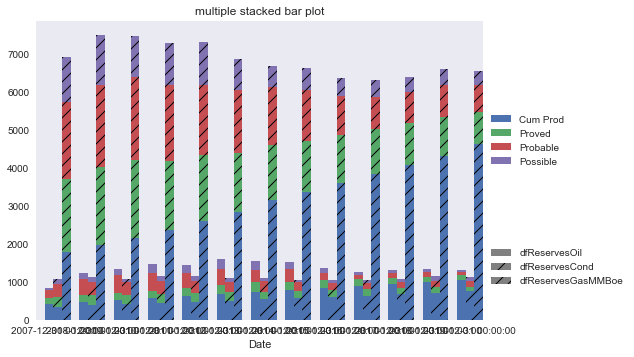

In [45]:
plot_clustered_stacked([dfReservesOil, dfReservesCond, dfReservesGasMMBoe],["dfReservesOil", "dfReservesCond", "dfReservesGasMMBoe"])

In [46]:
dfReservesOil = dfReservesOil.reset_index()
#dfReservesOil.dtypes
dfReservesOil['Date'] = dfReservesOil['Date'].dt.year
dfReservesOil
dfReservesOil = dfReservesOil.set_index(dfReservesOil['Date'])
dfReservesOil = dfReservesOil.drop(['Date'], axis=1)
dfReservesOil

,Cum Prod,Proved,Probable,Possible
Date,,,,
2007,406.100000,175.98,201.20,54.47
2008,458.780236,182.91,422.49,175.90
2009,515.005217,180.26,471.37,169.80
2010,570.913735,197.28,460.30,243.94
2011,622.010611,214.56,383.11,209.76
2012,676.536113,232.02,420.70,277.27
2013,731.061615,258.00,312.00,235.00
2014,781.611615,223.00,330.00,188.00
2015,837.211615,218.79,185.20,127.26


(0, 1700)

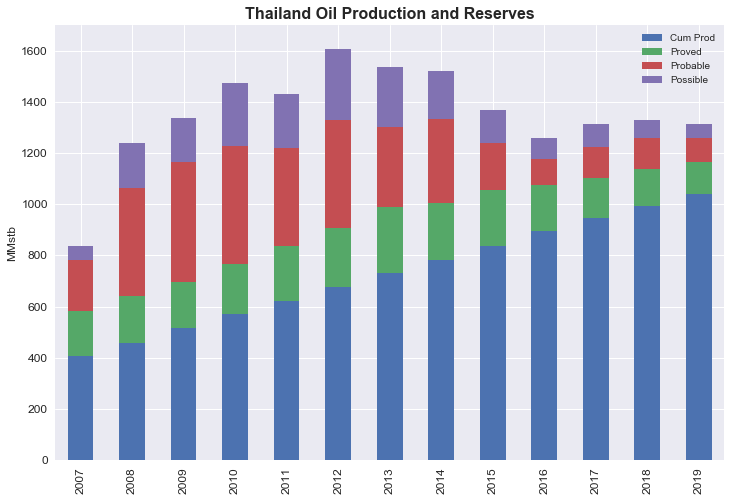

In [47]:
ax = dfReservesOil.plot(kind='bar', stacked =True, figsize=(12,8), fontsize = 12)

plt.title("Thailand Oil Production and Reserves", fontsize =16, weight = 'bold')
plt.ylabel("MMstb", fontsize =12)
ax.set_xlabel('')
ax.set_ylim([0,1700])


In [48]:
dfReservesCond = dfReservesCond.reset_index()
#dfReservesOil.dtypes
dfReservesCond['Date'] = dfReservesCond['Date'].dt.year
dfReservesCond = dfReservesCond.set_index(dfReservesCond['Date'])
dfReservesCond = dfReservesCond.drop(['Date'], axis=1)
#dfReservesCond

(0, 1400)

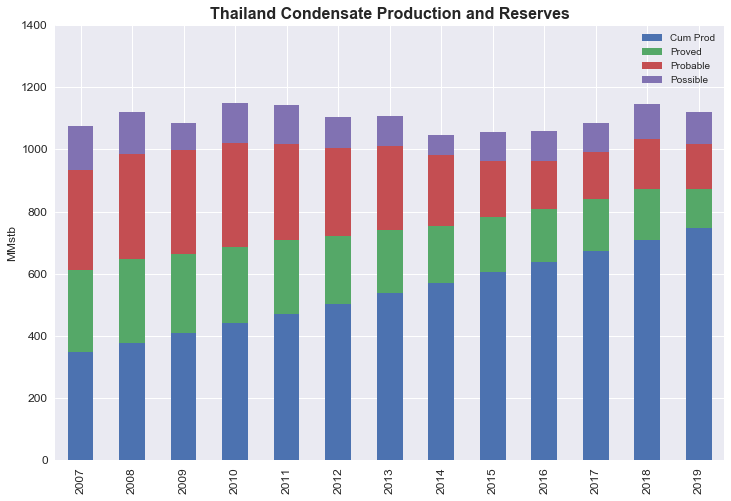

In [49]:
ax = dfReservesCond.plot(kind='bar', stacked =True, figsize=(12,8), fontsize = 12)

plt.title("Thailand Condensate Production and Reserves", fontsize =16, weight = 'bold')
plt.ylabel("MMstb", fontsize =12)
ax.set_xlabel('')
ax.set_ylim([0,1400])

In [50]:
dfReservesGas = dfReservesGas.reset_index()
#dfReservesOil.dtypes
dfReservesGas['Date'] = dfReservesGas['Date'].dt.year
dfReservesGas = dfReservesGas.set_index(dfReservesGas['Date'])
dfReservesGas = dfReservesGas.drop(['Date'], axis=1)
#dfReservesCond

Text(0.5, 0, '')

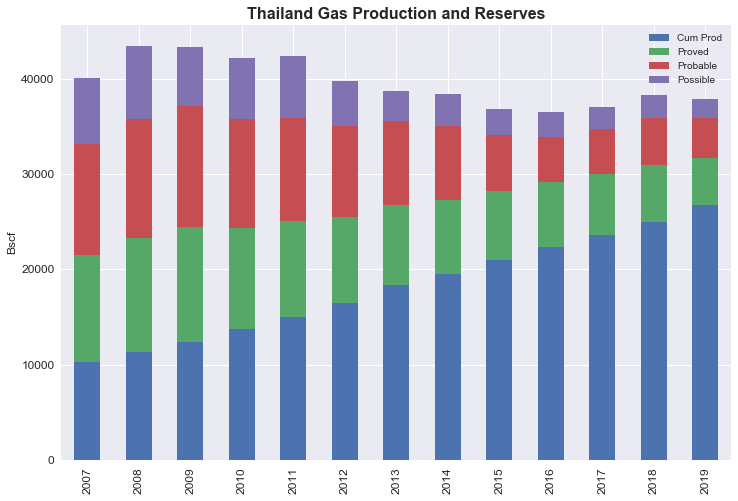

In [51]:
ax = dfReservesGas.plot(kind='bar', stacked =True, figsize=(12,8), fontsize = 12)

plt.title("Thailand Gas Production and Reserves", fontsize =16, weight = 'bold')
plt.ylabel("Bscf", fontsize =12)
ax.set_xlabel('')
#ax.set_ylim([0,1400])

In [52]:
dfReserves2.head()

,Type,Cum Prod,Proved,Probable,Possible
Date,,,,,
2007-12-31,Oil MMstb,406.100000,175.98,201.20,54.47
2007-12-31,Cond MMstb,346.400000,264.77,322.53,140.20
2007-12-31,Gas Bscf,10330.950000,11198.18,11675.97,6843.28
2008-12-31,Oil MMstb,458.780236,182.91,422.49,175.90
2008-12-31,Cond MMstb,377.470895,270.85,337.39,133.73


In [53]:
dfReserves3 = dfReservesGas/5.8 + dfReservesOil + dfReservesCond

print(dfReservesOil.head())
print(dfReservesCond.head())
print(dfReservesGas.head())
print(dfReserves3.head())

        Cum Prod  Proved  Probable  Possible
Date                                        
2007  406.100000  175.98    201.20     54.47
2008  458.780236  182.91    422.49    175.90
2009  515.005217  180.26    471.37    169.80
2010  570.913735  197.28    460.30    243.94
2011  622.010611  214.56    383.11    209.76
        Cum Prod  Proved  Probable  Possible
Date                                        
2007  346.400000  264.77    322.53    140.20
2008  377.470895  270.85    337.39    133.73
2009  408.094385  255.12    335.88     86.12
2010  440.443353  245.21    335.44    129.59
2011  471.153151  238.71    306.29    126.37
       Cum Prod    Proved  Probable  Possible
Date                                         
2007  10330.950  11198.18  11675.97   6843.28
2008  11347.806  12002.55  12482.86   7630.54
2009  12439.322  12026.42  12665.24   6170.13
2010  13720.732  10588.52  11479.16   6386.90
2011  15027.849  10061.13  10793.09   6569.11
         Cum Prod       Proved     Probable     

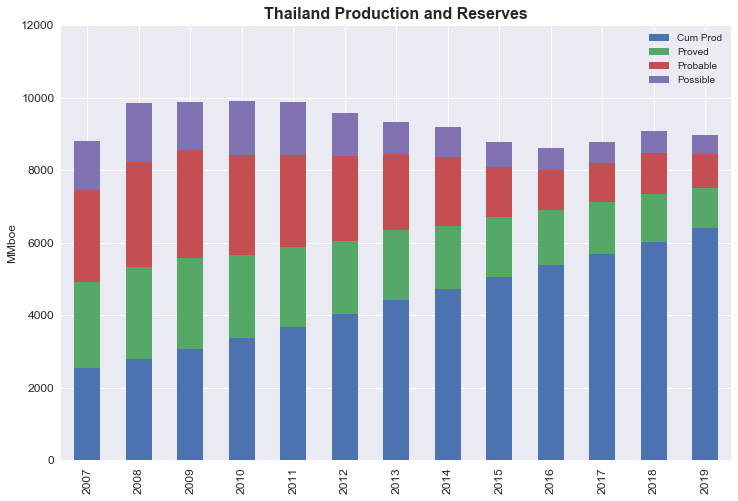

In [54]:
ax = dfReserves3.plot(kind='bar', stacked =True, figsize=(12,8), fontsize = 12)

plt.title("Thailand Production and Reserves", fontsize =16, weight = 'bold')
plt.ylabel("MMboe", fontsize =12)
ax.set_xlabel('')
ax.set_ylim([0,12000])

ax.figure.savefig('ProdnReserves.jpeg')

### Reserves and Production Metrics

In [55]:
dfReserves.head()
dfReserves4 = dfReserves.drop(['Cum Prod','Proved','Probable','Possible'], axis=1)
dfReserves4.head()

,Type,1P,2P,3P,Prod
Date,,,,,
2007-12-31,Oil MMstb,175.98,377.18,431.65,49.115428
2007-12-31,Cond MMstb,264.77,587.30,727.50,28.778486
2007-12-31,Gas Bscf,11198.18,22874.15,29717.43,917.917000
2008-12-31,Oil MMstb,182.91,605.40,781.30,52.680236
2008-12-31,Cond MMstb,270.85,608.24,741.97,31.070895


In [56]:
dfReservesOil4 = dfReserves4[dfReserves4['Type'] == 'Oil MMstb']
dfReservesOil4 = dfReservesOil4.drop(['Type'], axis=1)

dfReservesCond4 = dfReserves4[dfReserves4['Type'] == 'Cond MMstb']
dfReservesCond4 = dfReservesCond4.drop(['Type'], axis=1)

dfReservesGas4 = dfReserves4[dfReserves4['Type'] == 'Gas Bscf']
dfReservesGas4 = dfReservesGas4.drop(['Type'], axis=1)

print(dfReservesOil4.head())
print(dfReservesCond4.head())
print(dfReservesGas4.head())

dfReserves5 = dfReservesGas4/5.8 + dfReservesOil4 + dfReservesCond4

print(dfReserves5.head())

                1P      2P      3P       Prod
Date                                         
2007-12-31  175.98  377.18  431.65  49.115428
2008-12-31  182.91  605.40  781.30  52.680236
2009-12-31  180.26  651.63  821.43  56.224981
2010-12-31  197.28  657.58  901.52  55.908518
2011-12-31  214.56  597.67  807.43  51.096876
                1P      2P      3P       Prod
Date                                         
2007-12-31  264.77  587.30  727.50  28.778486
2008-12-31  270.85  608.24  741.97  31.070895
2009-12-31  255.12  591.00  677.12  30.623490
2010-12-31  245.21  580.65  710.24  32.348968
2011-12-31  238.71  545.00  671.37  30.709798
                  1P        2P        3P      Prod
Date                                              
2007-12-31  11198.18  22874.15  29717.43   917.917
2008-12-31  12002.55  24485.41  32115.95  1016.856
2009-12-31  12026.42  24691.66  30861.79  1091.516
2010-12-31  10588.52  22067.68  28454.58  1281.410
2011-12-31  10061.13  20854.22  27423.33  1307.117

In [57]:
dfReserves5['1PRPratio'] = dfReserves5['1P']/dfReserves5['Prod']
dfReserves5['2PRPratio'] = dfReserves5['2P']/dfReserves5['Prod']
dfReserves5

,1P,2P,3P,Prod,1PRPratio,2PRPratio
Date,,,,,,
2007-12-31,2371.470690,4908.298966,6282.844828,236.155466,10.041989,20.784185
2008-12-31,2523.165172,5435.262414,7060.502759,259.071131,9.739276,20.979807
2009-12-31,2508.900690,5499.812759,6819.548276,275.040885,9.121919,19.996346
2010-12-31,2268.096897,5043.002414,6517.722069,309.190245,7.335603,16.310354
2011-12-31,2187.947586,4738.225172,6206.960345,307.171674,7.122882,15.425332
2012-12-31,2007.214483,4362.364483,5544.546207,339.362232,5.914667,12.854596
2013-12-31,1912.862069,4010.758621,4899.310345,405.609301,4.716021,9.888231
2014-12-31,1741.551724,3646.758621,4473.034483,292.481034,5.954409,12.468359
2015-12-31,1655.697931,3035.492414,3729.090000,332.910345,4.973405,9.118048


In [58]:
dfReserves5 = dfReserves5.reset_index()
dfReserves5.loc[0, '1PRRR'] = dfReserves5.loc[0, '1P']

In [59]:
for i in range(1, len(dfReserves5)):
    dfReserves5.loc[i, '1PRRR'] = ((dfReserves5.loc[i, '1P'] - (dfReserves5.loc[i-1, '1P'] - dfReserves5.loc[i, 'Prod']))/dfReserves5.loc[i, 'Prod'])*100

In [60]:
dfReserves5.loc[0, '2PRRR'] = dfReserves5.loc[0, '2P']
for i in range(1, len(dfReserves5)):
    dfReserves5.loc[i, '2PRRR'] = ((dfReserves5.loc[i, '2P'] - (dfReserves5.loc[i-1, '2P'] - dfReserves5.loc[i, 'Prod']))/dfReserves5.loc[i, 'Prod'])*100

In [61]:
#dfReserves5['1PRRR']= dfReserves5['1PRRR'].apply(lambda x: round(x, 0))
dfReserves5

,Date,1P,2P,3P,Prod,1PRPratio,2PRPratio,1PRRR,2PRRR
0,2007-12-31,2371.470690,4908.298966,6282.844828,236.155466,10.041989,20.784185,2371.470690,4908.298966
1,2008-12-31,2523.165172,5435.262414,7060.502759,259.071131,9.739276,20.979807,158.553217,303.404928
2,2009-12-31,2508.900690,5499.812759,6819.548276,275.040885,9.121919,19.996346,94.813686,123.469363
3,2010-12-31,2268.096897,5043.002414,6517.722069,309.190245,7.335603,16.310354,22.117920,-47.744100
4,2011-12-31,2187.947586,4738.225172,6206.960345,307.171674,7.122882,15.425332,73.907324,0.779510
5,2012-12-31,2007.214483,4362.364483,5544.546207,339.362232,5.914667,12.854596,46.743307,-10.755015
6,2013-12-31,1912.862069,4010.758621,4899.310345,405.609301,4.716021,9.888231,76.738104,13.314152
7,2014-12-31,1741.551724,3646.758621,4473.034483,292.481034,5.954409,12.468359,41.428563,-24.452514
8,2015-12-31,1655.697931,3035.492414,3729.090000,332.910345,4.973405,9.118048,74.211137,-83.612860
9,2016-12-31,1526.984828,2610.178966,3238.873793,328.872690,4.643088,7.936746,60.862331,-29.324648


In [62]:
dfReserves5['Date'] = dfReserves5['Date'].dt.year
dfReserves5 = dfReserves5.set_index(dfReserves5['Date'])
dfReserves5 = dfReserves5.drop(['Date'], axis=1)

In [63]:
dfReserves5= dfReserves5.drop([dfReserves5.index[0]])

In [64]:
dfReserves5

,1P,2P,3P,Prod,1PRPratio,2PRPratio,1PRRR,2PRRR
Date,,,,,,,,
2008,2523.165172,5435.262414,7060.502759,259.071131,9.739276,20.979807,158.553217,303.404928
2009,2508.900690,5499.812759,6819.548276,275.040885,9.121919,19.996346,94.813686,123.469363
2010,2268.096897,5043.002414,6517.722069,309.190245,7.335603,16.310354,22.117920,-47.744100
2011,2187.947586,4738.225172,6206.960345,307.171674,7.122882,15.425332,73.907324,0.779510
2012,2007.214483,4362.364483,5544.546207,339.362232,5.914667,12.854596,46.743307,-10.755015
2013,1912.862069,4010.758621,4899.310345,405.609301,4.716021,9.888231,76.738104,13.314152
2014,1741.551724,3646.758621,4473.034483,292.481034,5.954409,12.468359,41.428563,-24.452514
2015,1655.697931,3035.492414,3729.090000,332.910345,4.973405,9.118048,74.211137,-83.612860
2016,1526.984828,2610.178966,3238.873793,328.872690,4.643088,7.936746,60.862331,-29.324648


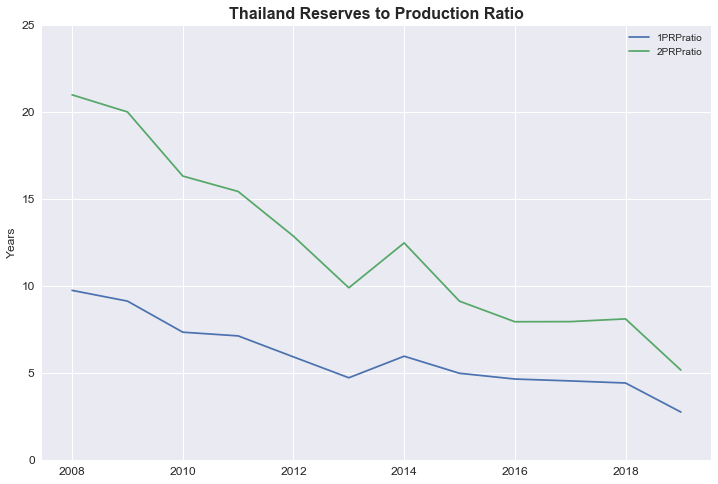

In [65]:
ax = dfReserves5.plot(y=["1PRPratio", "2PRPratio"], kind='line', figsize=(12,8), fontsize = 12)


plt.title("Thailand Reserves to Production Ratio", fontsize =16, weight = 'bold')
plt.ylabel("Years", fontsize =12)
ax.set_xlabel('')
ax.set_ylim([0,25])

ax.figure.savefig('RPratio.jpeg')

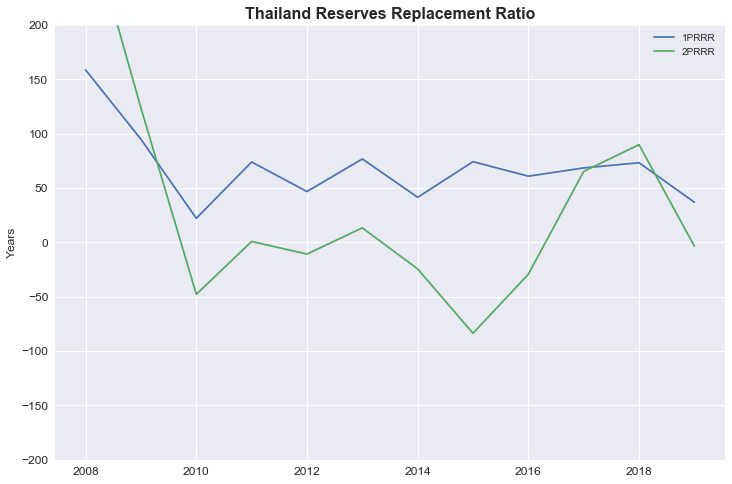

In [66]:
ax = dfReserves5.plot(y=["1PRRR", "2PRRR"], kind='line', figsize=(12,8), fontsize = 12)


plt.title("Thailand Reserves Replacement Ratio", fontsize =16, weight = 'bold')
plt.ylabel("Years", fontsize =12)
ax.set_xlabel('')
ax.set_ylim([-200,200])

ax.figure.savefig('RRRratio.jpeg')

### Drilling Activity

In [67]:
#Load Wells Data
#df = pd.read_excel("ThailandProdPython.xlsx")
dfWell = pd.read_excel("ThailandProdPython.xlsx", sheet_name = 'Wells', index_col=0, parse_dates=True)

In [68]:
dfWell.head()

,Land Exp,Land Dis,Land Dev,Off Exp,Off Dis,Off Dev
Year,,,,,,
1971-01-01,1,NaN,0,1,NaN,0
1972-01-01,0,NaN,0,5,NaN,0
1973-01-01,0,NaN,0,3,NaN,0
1974-01-01,1,NaN,0,11,NaN,0
1975-01-01,0,NaN,0,10,NaN,0


In [69]:
dfWell2 = dfWell.drop(['Land Dis', 'Off Dis'], axis=1)

In [70]:
dfWell2=dfWell2.reset_index()
dfWell2.head()

,Year,Land Exp,Land Dev,Off Exp,Off Dev
0,1971-01-01,1,0,1,0
1,1972-01-01,0,0,5,0
2,1973-01-01,0,0,3,0
3,1974-01-01,1,0,11,0
4,1975-01-01,0,0,10,0


In [71]:
dfWell2['Year'] = dfWell2['Year'].dt.year

In [72]:
dfWell2 = dfWell2.set_index(dfWell2['Year'])
dfWell2 = dfWell2.drop(['Year'], axis=1)
dfWell2.head()

,Land Exp,Land Dev,Off Exp,Off Dev
Year,,,,
1971,1,0,1,0
1972,0,0,5,0
1973,0,0,3,0
1974,1,0,11,0
1975,0,0,10,0


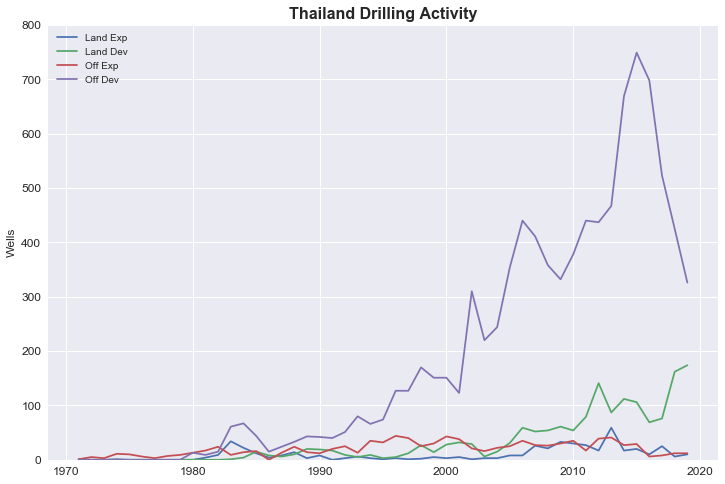

In [73]:
ax = dfWell2.plot(kind='line', figsize=(12,8), fontsize = 12)


plt.title("Thailand Drilling Activity", fontsize =16, weight = 'bold')
plt.ylabel("Wells", fontsize =12)
ax.set_xlabel('')
ax.set_ylim([0,800])

ax.figure.savefig('DrillingHist.jpeg')

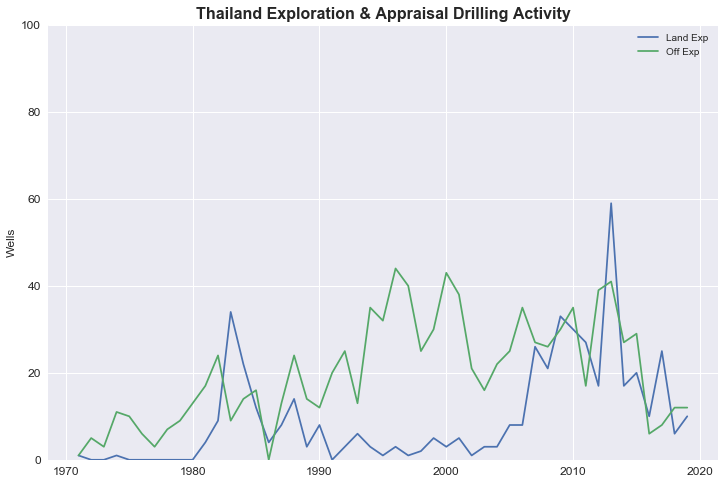

In [74]:
ax = dfWell2.plot(y=["Land Exp", "Off Exp"], kind='line', figsize=(12,8), fontsize = 12)


plt.title("Thailand Exploration & Appraisal Drilling Activity", fontsize =16, weight = 'bold')
plt.ylabel("Wells", fontsize =12)
ax.set_xlabel('')
ax.set_ylim([0,100])

ax.figure.savefig('DrillingHistExp.jpeg')

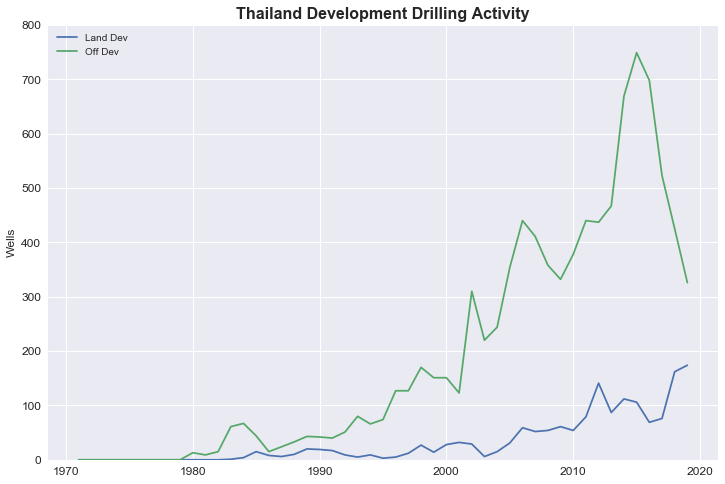

In [75]:
ax = dfWell2.plot(y=["Land Dev", "Off Dev"], kind='line', figsize=(12,8), fontsize = 12)


plt.title("Thailand Development Drilling Activity", fontsize =16, weight = 'bold')
plt.ylabel("Wells", fontsize =12)
ax.set_xlabel('')
ax.set_ylim([0,800])

ax.figure.savefig('DrillingHistDev.jpeg')

### StakeHolders and Players

In [33]:
print(dfSum.dtypes)
dfSum.head()

OnOff             object
Discovery         object
FirstOil          object
Block             object
Contract          object
Operator          object
Gp Bscf          float64
Cp MMstb         float64
Np MMstb         float64
1P Bscf          float64
1P MMstbC        float64
1P MMstb         float64
Chevron          float64
Moeco            float64
PTTEP            float64
Total            float64
PSL              float64
KrisE            float64
Mubadala         float64
Tap Energy       float64
Northern Gulf    float64
Medco              int64
CEPSA              int64
CHESS              int64
CPOC               int64
XOM              float64
Apico            float64
Eco Orient         int64
Pan Orient         int64
Sino US          float64
Central Place    float64
Thai Offshore    float64
CNPCHK             int64
MMBOEp           float64
MMBOE1p          float64
dtype: object


,OnOff,Discovery,FirstOil,Block,Contract,Operator,Gp Bscf,Cp MMstb,Np MMstb,1P Bscf,...,XOM,Apico,Eco Orient,Pan Orient,Sino US,Central Place,Thai Offshore,CNPCHK,MMBOEp,MMBOE1p
Area,,,,,,,,,,,,,,,,,,,,,
Erawan,Offshore,1973-01-01 00:00:00,1981-08-01 00:00:00,"B12,B13",Contract 1 / 2,Chevron,3288.08,112.82,0.00,278.26,...,0.0,0.0,0,0,0.0,0.0,0.0,0,679.730345,56.295862
Sirikit et al,Land,1981-09-01 00:00:00,1982-12-01 00:00:00,S1,-,PTTEP,561.53,0.00,287.52,47.46,...,0.0,0.0,0,0,0.0,0.0,0.0,0,384.335517,45.412759
Baanpot,Offshore,1974-05-01 00:00:00,1983-10-01 00:00:00,"B12,B13",Contract 1 / 2,Chevron,423.86,17.48,0.00,30.84,...,0.0,0.0,0,0,0.0,0.0,0.0,0,90.559310,6.267241
Satun,Offshore,1980-10-01 00:00:00,1985-01-01 00:00:00,"B10, B11, B12",Contract 1 / 2,Chevron,2163.90,65.85,0.00,104.83,...,0.0,0.0,0,0,0.0,0.0,0.0,0,438.936207,21.464138
Platong,Offshore,1976-06-01 00:00:00,1985-03-01 00:00:00,"B10, B11, B12",Contract 1 / 2,Chevron,680.83,38.41,0.00,298.32,...,0.0,0.0,0,0,0.0,0.0,0.0,0,155.794483,67.624483


In [34]:
dfSum2 = dfSum.drop(['OnOff', 'Discovery', 'Block', 'FirstOil', 'Contract', 'Operator', 'Gp Bscf', 'Cp MMstb', 'Np MMstb', '1P Bscf', '1P MMstbC', '1P MMstb','MMBOE1p'], axis=1)
dfSum2.dtypes

Chevron          float64
Moeco            float64
PTTEP            float64
Total            float64
PSL              float64
KrisE            float64
Mubadala         float64
Tap Energy       float64
Northern Gulf    float64
Medco              int64
CEPSA              int64
CHESS              int64
CPOC               int64
XOM              float64
Apico            float64
Eco Orient         int64
Pan Orient         int64
Sino US          float64
Central Place    float64
Thai Offshore    float64
CNPCHK             int64
MMBOEp           float64
dtype: object

In [35]:
dfSum2 = dfSum2.drop(['MMBOEp'], axis=1)
dfSum2.head()

,Chevron,Moeco,PTTEP,Total,PSL,KrisE,Mubadala,Tap Energy,Northern Gulf,Medco,...,CHESS,CPOC,XOM,Apico,Eco Orient,Pan Orient,Sino US,Central Place,Thai Offshore,CNPCHK
Area,,,,,,,,,,,,,,,,,,,,,
Erawan,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
Sirikit et al,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
Baanpot,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
Satun,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
Platong,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0


In [36]:
dfSum['MMBOEp']

Area
Erawan                     679.730345
Sirikit et al              384.335517
Baanpot                     90.559310
Satun                      438.936207
Platong                    155.794483
                              ...    
Wichian Buri North East      0.280000
Yala East                   59.150000
Borang North                 1.960000
CHESS                      333.067586
CPOC                       123.898621
Name: MMBOEp, Length: 76, dtype: float64

In [37]:
dfSum3 = dfSum2.multiply(dfSum["MMBOEp"], axis="index")

In [38]:
dfSum3.head()

,Chevron,Moeco,PTTEP,Total,PSL,KrisE,Mubadala,Tap Energy,Northern Gulf,Medco,...,CHESS,CPOC,XOM,Apico,Eco Orient,Pan Orient,Sino US,Central Place,Thai Offshore,CNPCHK
Area,,,,,,,,,,,,,,,,,,,,,
Erawan,543.784276,135.946069,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sirikit et al,0.000000,0.000000,384.335517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baanpot,72.447448,18.111862,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Satun,351.148966,87.787241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Platong,124.635586,31.158897,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
print(dfSum3.sum(axis=0))

Chevron          3297.989530
Moeco             707.296254
PTTEP            1185.284916
Total             398.586153
PSL                14.071481
KrisE              30.287804
Mubadala           99.597000
Tap Energy          4.893000
Northern Gulf       1.631000
Medco              37.450000
CEPSA              44.960000
CHESS             333.067586
CPOC              123.898621
XOM                65.259793
Apico              27.098931
Eco Orient         18.270000
Pan Orient          2.640000
Sino US             3.280000
Central Place       2.186448
Thai Offshore       1.093552
CNPCHK              3.960000
dtype: float64


In [114]:
dfSum4 = pd.DataFrame(dfSum3.sum(axis=0), columns=['sum'])

In [115]:
dfSum4

,sum
Chevron,3297.989530
Moeco,707.296254
PTTEP,1185.284916
Total,398.586153
PSL,14.071481
KrisE,30.287804
Mubadala,99.597000
Tap Energy,4.893000
Northern Gulf,1.631000
Medco,37.450000


Text(0.5, 0, '')

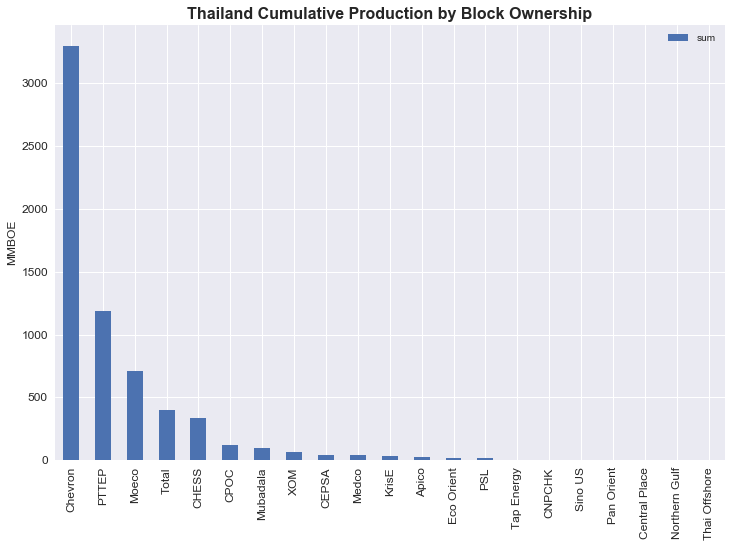

In [116]:
dfSum4_sorted= dfSum4.sort_values('sum', ascending=False)
ax = dfSum4_sorted.plot(kind='bar', figsize=(12,8), fontsize = 12)


plt.title("Thailand Cumulative Production by Block Ownership", fontsize =16, weight = 'bold')
plt.ylabel("MMBOE", fontsize =12)
ax.set_xlabel('')
#ax.set_yscale("log")
#ax.set_ylim([0,100])

#ax.figure.savefig('PlayersProd.jpeg')

In [117]:
dfSum4_sorted.head()

,sum
Chevron,3297.989530
PTTEP,1185.284916
Moeco,707.296254
Total,398.586153
CHESS,333.067586


In [118]:
dictdfSum4_sorted = dfSum4_sorted['sum'].to_dict()

In [119]:
dictdfSum4_sorted

{'Chevron': 3297.9895298968977,
 'PTTEP': 1185.2849155172414,
 'Moeco': 707.2962542413793,
 'Total': 398.58615313758617,
 'CHESS': 333.0675862068966,
 'CPOC': 123.89862068965517,
 'Mubadala': 99.597,
 'XOM': 65.25979310344827,
 'CEPSA': 44.96,
 'Medco': 37.45,
 'KrisE': 30.287804103448277,
 'Apico': 27.098931034482757,
 'Eco Orient': 18.270000000000003,
 'PSL': 14.071481034482758,
 'Tap Energy': 4.893,
 'CNPCHK': 3.96,
 'Sino US': 3.28,
 'Pan Orient': 2.64,
 'Central Place': 2.186448,
 'Northern Gulf': 1.631,
 'Thai Offshore': 1.0935519999999999}

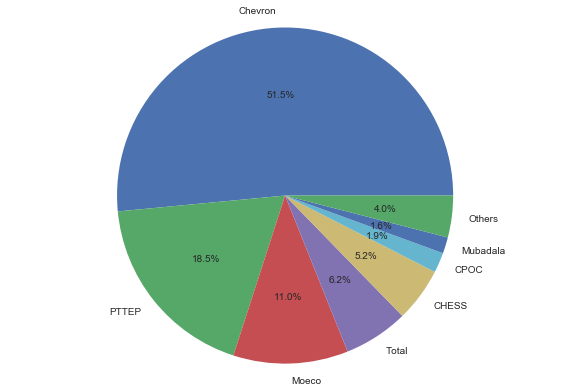

<Figure size 216x216 with 0 Axes>

In [120]:
newdic={}
for key, group in itertools.groupby(dictdfSum4_sorted, lambda k: 'Others' if (dictdfSum4_sorted[k]<71) else k):
     newdic[key] = sum([dictdfSum4_sorted[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.figure(figsize=(3, 3))

plt.show()

In [121]:
dfSum4_sorted2 = pd.DataFrame(sizes, index =labels, columns =['MMBOEp'])

In [122]:
dfSum4_sorted2=dfSum4_sorted2.reset_index()

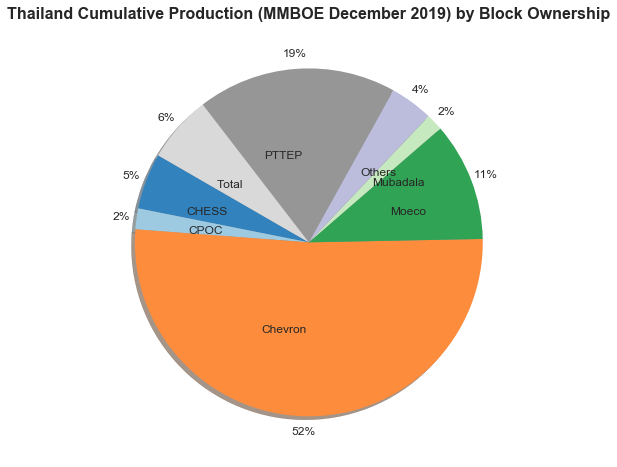

In [123]:
ax = dfSum4_sorted2.groupby(['index'])['MMBOEp'].sum().plot(
    kind='pie',
    figsize=(12,8),
    #explode = (0,0.1,0),
    #colors = ['#9ACD32', '#FF6347', '#008000'],
    autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    #autopct=lambda pct: func(pct, totalCumP),
    pctdistance=1.09, labeldistance=0.5,
    shadow=True, startangle=150, 
    fontsize = 12,
    cmap="tab20c", # defaults to orangish
)


plt.title("Thailand Cumulative Production (MMBOE December 2019) by Block Ownership", fontsize =16, weight = 'bold')
ax.set_ylabel('')


ax.figure.savefig('PlayersProd.jpeg')

In [124]:
#dfSumOp = pd.DataFrame(dfSum(['Operator', 'MMBOEp']))
#dfSumOp.dtypes

dfSumOp = dfSum.filter(['Operator', 'MMBOEp'], axis=1)
print(dfSumOp.dtypes)
dfSumOp.head()

Operator     object
MMBOEp      float64
dtype: object


,Operator,MMBOEp
Area,,
Erawan,Chevron,679.730345
Sirikit et al,PTTEP,384.335517
Baanpot,Chevron,90.559310
Satun,Chevron,438.936207
Platong,Chevron,155.794483


In [125]:
dfSumOpG = dfSumOp.groupby(['Operator'])['MMBOEp'].sum()
dfSumOpG = dfSumOpG.sort_values(ascending=False)

In [126]:
#dfSumOpG=dfSumOpG.reset_index()

In [127]:
dfSumOpG

Operator
Chevron       3712.574828
PTTEP         1930.438621
CHESS          333.067586
CPOC           123.898621
Mubadala       107.480000
XOM             71.896552
CEPSA           44.960000
Medco           37.450000
Eco Orient      18.270000
KrisEnergy       8.070000
Sino US          6.560000
CNPCHK           3.960000
Pan Orient       2.640000
Moeco            1.535862
Name: MMBOEp, dtype: float64

In [128]:
dictOpG = dfSumOpG.to_dict()

In [129]:
dictOpG 

{'Chevron': 3712.5748275862065,
 'PTTEP': 1930.4386206896552,
 'CHESS': 333.0675862068966,
 'CPOC': 123.89862068965517,
 'Mubadala': 107.48,
 'XOM': 71.89655172413794,
 'CEPSA': 44.96,
 'Medco': 37.45,
 'Eco Orient': 18.270000000000003,
 'KrisEnergy': 8.07,
 'Sino US': 6.56,
 'CNPCHK': 3.96,
 'Pan Orient': 2.64,
 'Moeco': 1.5358620689655174}

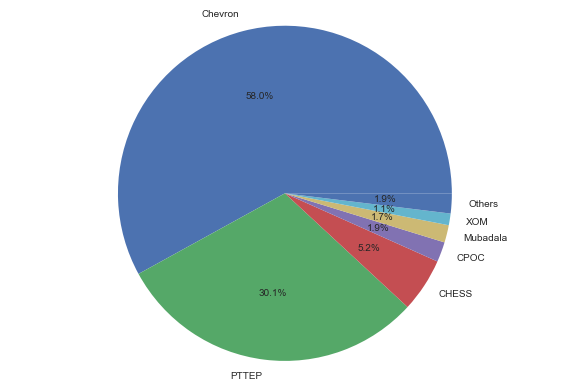

<Figure size 216x216 with 0 Axes>

In [130]:
import itertools
newdic={}
for key, group in itertools.groupby(dictOpG, lambda k: 'Others' if (dictOpG[k]<71) else k):
     newdic[key] = sum([dictOpG[k] for k in list(group)])   

labelsOp = newdic.keys()
sizesOp = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizesOp, labels=labelsOp, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.figure(figsize=(3, 3))

plt.show()

In [131]:
dictOpG2  = pd.DataFrame(sizesOp, index =labelsOp, columns =['MMBOEp'])

In [132]:
dictOpG2

,MMBOEp
Chevron,3712.574828
PTTEP,1930.438621
CHESS,333.067586
CPOC,123.898621
Mubadala,107.480000
XOM,71.896552
Others,123.445862


In [133]:
dictOpG2=dictOpG2.reset_index()

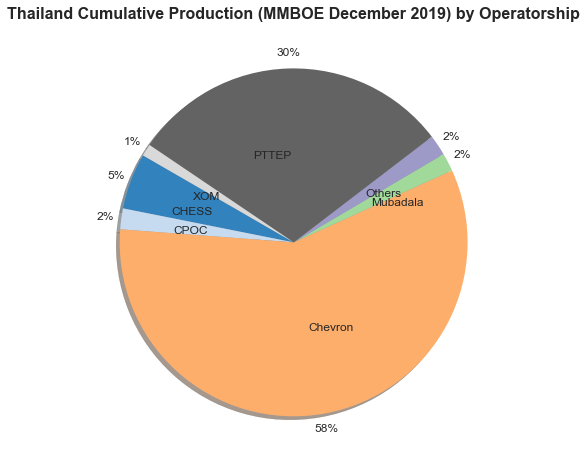

In [134]:
ax = dictOpG2.groupby(['index'])['MMBOEp'].sum().plot(
    kind='pie',
    figsize=(12,8),
    #explode = (0,0.1,0),
    #colors = ['#9ACD32', '#FF6347', '#008000'],
    autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    #autopct=lambda pct: func(pct, totalCumP),
    pctdistance=1.09, labeldistance=0.5,
    shadow=True, startangle=150, 
    fontsize = 12,
    cmap="tab20c", # defaults to orangish
)


plt.title("Thailand Cumulative Production (MMBOE December 2019) by Operatorship", fontsize =16, weight = 'bold')
ax.set_ylabel('')


ax.figure.savefig('OpProd.jpeg')

In [135]:
#Load Wells Data
#df = pd.read_excel("ThailandProdPython.xlsx")
dfstake = pd.read_excel("ThailandProdPython.xlsx", sheet_name = 'Stake', index_col=0, parse_dates=True)

In [136]:
dfstake

,BOPD,MMCFD,BCPD,Operator
Field,,,,
Sirikit,28373,30,0,PTTEP
B8/32,11724,66,0,Chevron
Erawan,21481,1049,32964,Chevron
Jasmine,11213,5,0,Mubadala
Songkhla,0,0,0,CEPSA
Bualuang,7961,0,0,Medco
Nasanun,379,0,0,EcoOrient
Manora,7551,0,0,Mubadala
NongYao,8903,0,0,Mubadala


In [137]:
dfstake['BOEPD'] = dfstake['BOPD'] + dfstake['BCPD'] + (dfstake['MMCFD']/5.8)*1000

Text(0, 0.5, '')

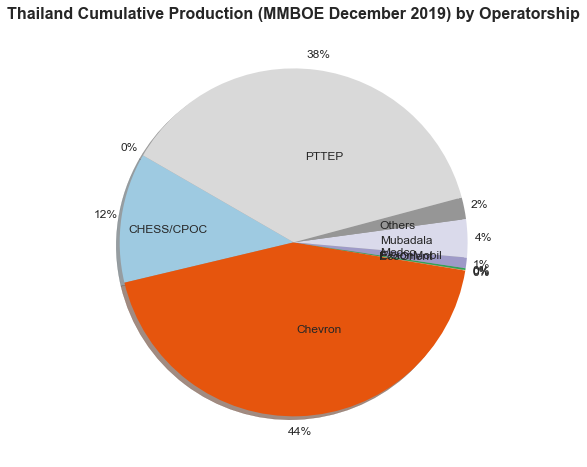

In [138]:
ax = dfstake.groupby(['Operator'])['BOEPD'].sum().plot(
    kind='pie',
    figsize=(12,8),
    #explode = (0,0.1,0),
    #colors = ['#9ACD32', '#FF6347', '#008000'],
    autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    #autopct=lambda pct: func(pct, totalCumP),
    pctdistance=1.09, labeldistance=0.5,
    shadow=True, startangle=150, 
    fontsize = 12,
    cmap="tab20c", # defaults to orangish
)


plt.title("Thailand Cumulative Production (MMBOE December 2019) by Operatorship", fontsize =16, weight = 'bold')
ax.set_ylabel('')


#ax.figure.savefig('OpProd.jpeg')

In [139]:
#dfstake2 = dfstake.groupby(['Operator'])['BOEPD'].agg('sum')
dfstake2 = dfstake.groupby(['Operator'], as_index=False)['BOEPD'].sum()
#dfstake2.columns.values[1] = 'Signal'

In [140]:
dfstake2

,Operator,BOEPD
0,CEPSA,0.000000
1,CHESS/CPOC,97241.379310
2,Chevron,352374.862069
3,EcoOrient,379.000000
4,ExxonMobil,1379.310345
5,KrisEnergy,0.000000
6,Medco,7961.000000
7,Mubadala,28529.068966
8,Others,16193.379310
9,PTTEP,302590.379310


In [141]:
dfstake2 = dfstake2.set_index(dfstake2['Operator'])

In [142]:
dictstake2 = dfstake2['BOEPD'].to_dict()

In [143]:
dictstake2

{'CEPSA': 0.0,
 'CHESS/CPOC': 97241.37931034483,
 'Chevron': 352374.86206896557,
 'EcoOrient': 379.0,
 'ExxonMobil': 1379.3103448275863,
 'KrisEnergy': 0.0,
 'Medco': 7961.0,
 'Mubadala': 28529.06896551724,
 'Others': 16193.379310344826,
 'PTTEP': 302590.3793103448}

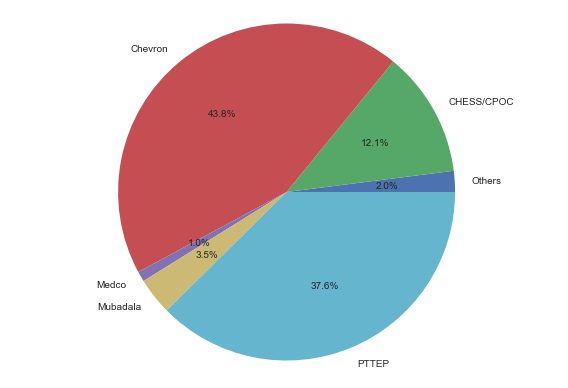

<Figure size 216x216 with 0 Axes>

In [144]:
import itertools
newdic={}
for key, group in itertools.groupby(dictstake2, lambda k: 'Others' if (dictstake2[k]<2000) else k):
     newdic[key] = sum([dictstake2[k] for k in list(group)])   

labelsst = newdic.keys()
sizesst = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizesst, labels=labelsst, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.figure(figsize=(3, 3))

plt.show()

In [145]:
dictstake2  = pd.DataFrame(sizesst, index =labelsst, columns =['BOEPD'])

In [146]:
dictstake2=dictstake2.reset_index()

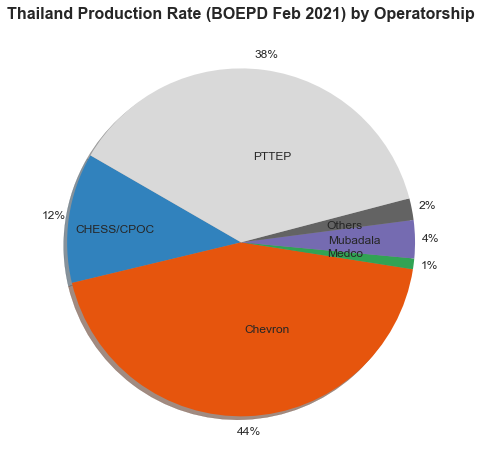

In [147]:
ax = dictstake2.groupby(['index'])['BOEPD'].sum().plot(
    kind='pie',
    figsize=(12,8),
    #explode = (0,0.1,0),
    #colors = ['#9ACD32', '#FF6347', '#008000'],
    autopct='%1.0f%%',
    #,autopct=lambda p: '{:.0f}'.format(p * total / 100),
    #autopct=lambda pct: func(pct, totalCumP),
    pctdistance=1.09, labeldistance=0.5,
    shadow=True, startangle=150, 
    fontsize = 12,
    cmap="tab20c", # defaults to orangish
)


plt.title("Thailand Production Rate (BOEPD Feb 2021) by Operatorship", fontsize =16, weight = 'bold')
ax.set_ylabel('')


ax.figure.savefig('OpProdrate.jpeg')

In [148]:
(dfstake.loc['Erawan','BOEPD']/dfstake['BOEPD'].sum())*100

29.17095911934966